# Optical example
Let's use EOReader with optical data.

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import RED, GREEN, NDVI, YELLOW, CLOUDS, to_str

## Open the product

First, open a `Landsat-9 OLI-TIRS` collection 2 product.

In [2]:
path = os.path.join("/home", "prods", "LANDSATS_COL2", "LC09_L1TP_200030_20220201_20220201_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

eoreader.LandsatProduct 'LC09_L1TP_200030_20220201_20220201_02_T1'
Attributes:
	condensed_name: 20220201T104852_L9_200030_OLI_TIRS
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_20220201_20220201_02_T1.tar
	constellation: Landsat-9
	sensor type: Optical
	product type: L1
	default pixel size: 30.0
	default resolution: 30.0
	acquisition datetime: 2022-02-01T10:48:52
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	needs extraction: False
	cloud cover: 49.31
	tile name: 200030

## Product information
You have opened your product, and you have its object in hands.  
You can play a little with it to see what it is inside

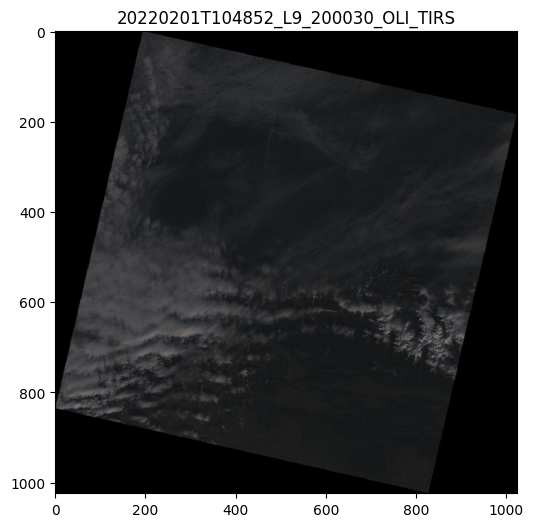

In [3]:
# Plot the quicklook
prod.plot()

In [4]:
# Get the band information
prod.bands

eoreader.SpectralBand 'Coastal aerosol'
Attributes:
	id: 1
	eoreader_name: COASTAL_AEROSOL
	common_name: coastal
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 440.0
	Bandwidth (nm): 20.0
	description: Coastal and aerosol studies
eoreader.SpectralBand 'Blue'
Attributes:
	id: 2
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 480.0
	Bandwidth (nm): 60.0
	description: Bathymetric mapping, distinguishing soil from vegetation and deciduous from coniferous vegetation
eoreader.SpectralBand 'Green'
Attributes:
	id: 3
	eoreader_name: GREEN
	common_name: green
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 560.0
	Bandwidth (nm): 60.0
	description: Emphasizes peak vegetation, which is useful for assessing plant vigor
eoreader.SpectralBand 'Red'
Attributes:
	id: 4
	eoreader_name: RED
	common_name: red
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 655.0
	Bandwidth (nm): 30.0
	description: Discrim

In [5]:
# Some other information
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")
print(f"Landsat tile: {prod.tile_name}")

Acquisition datetime: 2022-02-01 10:48:52
Condensed name: 20220201T104852_L9_200030_OLI_TIRS
Landsat tile: 200030


In [6]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32630)

/opt/conda/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/opt/conda/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


<Axes: >

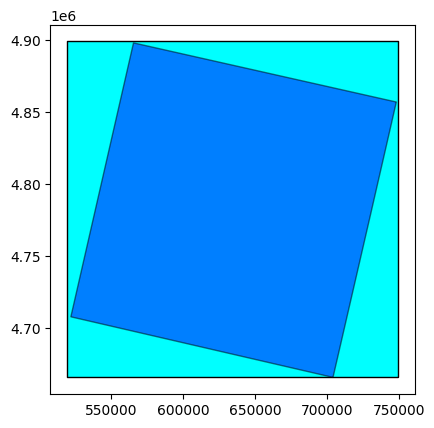

In [7]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

See the difference between footprint and extent hereunder:

|Without nodata | With nodata|
|--- | ---|
| ![without_nodata](https://zupimages.net/up/21/14/69i6.gif) | ![with_nodata](https://zupimages.net/up/21/14/vg6w.gif) |

## Load bands

Let's open some spectral and cloud bands.

In [8]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Be sure they exist for Landsat-9 OLI-TIRS sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))
# Landsat-9 OLI-TIRS doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [9]:
# Load those bands as a xarray.Dataset
band_ds = prod.load(ok_bands)
band_ds[GREEN]

<xarray.DataArray <SpectralBandNames.GREEN: 'GREEN'> (band: 1, y: 7791, x: 7681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes: (12/13)
    long_name:         GREEN
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    ...                ...
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       49.31

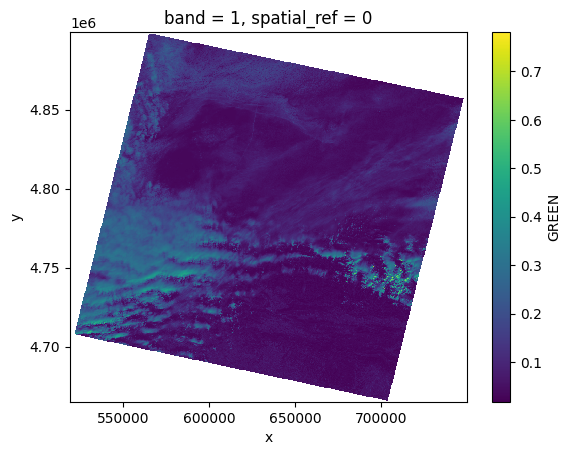

In [10]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_ds[GREEN][:, ::10, ::10].plot()

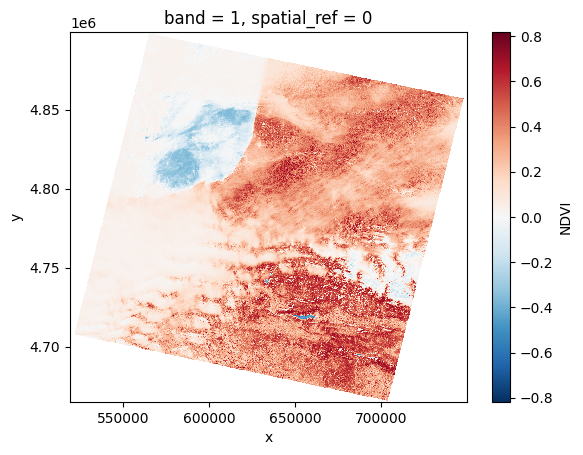

In [11]:
# Plot a subsampled version
band_ds[NDVI][:, ::10, ::10].plot()

## Load a stack
You can also stack the bands you requested right before

In [12]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

/opt/conda/lib/python3.11/site-packages/xarray/core/indexes.py:659: RuntimeWarning: '<' not supported between instances of 'CloudsBandNames' and 'SpectralBandNames', sort order is undefined for incomparable objects.
  new_pd_index = pd_indexes[0].append(pd_indexes[1:])


<xarray.DataArray 'GREEN_NDVI_CLOUDS' (bands: 3, y: 7791, x: 7681)>
dask.array<transpose, shape=(3, 7791, 7681), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
    spatial_ref  int64 0
  * bands        (bands) object MultiIndex
  * variable     (bands) object SpectralBandNames.GREEN ... CloudsBandNames.C...
  * band         (bands) int64 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    instrument:        OLI-TIRS
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    cloud_cover:       49.31

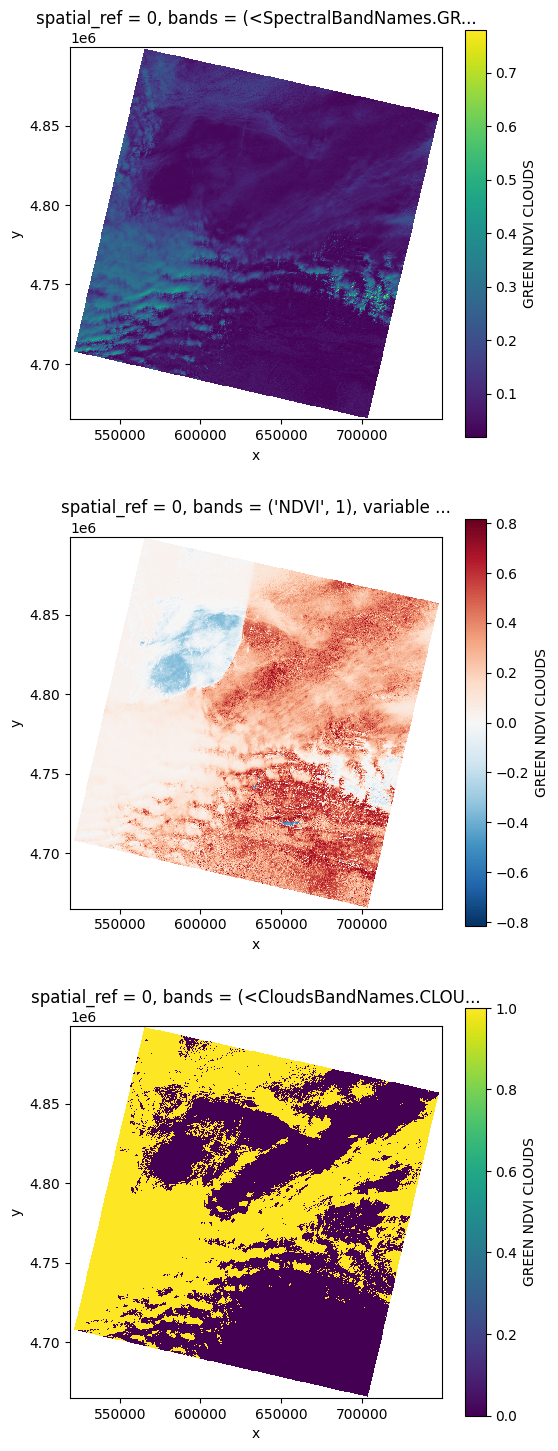

In [13]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])


## Radiometric processing
EOReader allows you to load the band array as provided (either in DN, scaled radiance or reflectance).
However, by default, EOReader converts all optical bands in reflectance
(except for the thermal bands that are left if brilliance temperature)

The radiometric processing is described in the band's attribute, either `reflectance` or `as is` 

In [14]:
# Reflectance band
from eoreader.keywords import TO_REFLECTANCE
prod.load(RED, **{TO_REFLECTANCE: True})

<xarray.Dataset>
Dimensions:                (band: 1, x: 7681, y: 7791)
Coordinates:
  * band                   (band) int64 1
  * x                      (x) float64 5.193e+05 5.193e+05 ... 7.497e+05
  * y                      (y) float64 4.899e+06 4.899e+06 ... 4.665e+06
    spatial_ref            int64 0
Data variables:
    SpectralBandNames.RED  (band, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes: (12/13)
    long_name:         RED
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    ...                ...
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       49.31

In [15]:
# As is band
prod.load(RED, **{TO_REFLECTANCE: False})

<xarray.Dataset>
Dimensions:                (band: 1, x: 7681, y: 7791)
Coordinates:
  * band                   (band) int64 1
  * x                      (x) float64 5.193e+05 5.193e+05 ... 7.497e+05
  * y                      (y) float64 4.899e+06 4.899e+06 ... 4.665e+06
    spatial_ref            int64 0
Data variables:
    SpectralBandNames.RED  (band, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes: (12/13)
    long_name:         RED
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    ...                ...
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    radiometry:        as is
    cloud_cover:       49.31